# Classify and identify automobile images with Keras (Tensorflow as backend)

## Part 1

Keras is a high level deep learning API that helps quickly build neural networks via a modular approach. Keras is built on top of Tensorflow provides support for training on CPU or GPU. With Keras, users can design and iterate on machine learning ideas, moving from experiments to production very quickly. In this tutorial, we will introduce several key Keras API calls and features.Today we're going to build, train and evaluate some deep learning classifiers in the context of Computer Vision with the CIFAR-10 dataset, a collection of images that can be clasffied into diffrent categories based on type. By the end of this tutorial you'll be able to apply the concepts here in your own projects.

The CIFAR-10 data set  is one of the more well known classification problems in machine learning, anagalous to doing descriptive statistics with the titanic dataset. Cifar-10 contains 60000 32 × 32 pixel color images in 10 separate classes, with 6000 images per class. For training and testing, the set contains 50000 training images and 10000 in the test/validation image set.

[Read more about it here](https://www.cs.toronto.edu/~kriz/cifar.html)

Luckily, keras has this dataset built in, but incase you run into issues, or would like to import it yourself

[Click here to download the set!](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

## Keras installation

The recommended method to install Keras into a python enviromment is to use Anaconda. So thats what well do now!
Run the following command to get started:

[Keras on Anaconda](https://anaconda.org/conda-forge/keras)

```
sudo conda install -c conda-forge keras
```

## Importing our modules
The first thing we need to do is to import alll of the neccesary modules from Keras, as well as our plotting tools( for visualizing whats going on under the hood)

In [1]:
#### Do an explanaiton fo the keras imports  section by section for clarity. Fulle xplantion on initialization

#### explain batch, epoch Soft max for the last layer


# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
# import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

Using TensorFlow backend.


Next, we need to begin the set up for splitting our data into smaller sections, for processing this is a usal step, since attempting to run all of the data in the model all at one would result in slower run times and crashes!

Next, we need to load the training data as well as the test data into variables we can use in our model. This follows the same format as yure familiar with ! Lets get that done now.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 


The next thing that we will do is make a custom function that you can use in your future projects to visualize classes (or categories) that your images belong to. This will depend on the class_name list that we defined earlier 

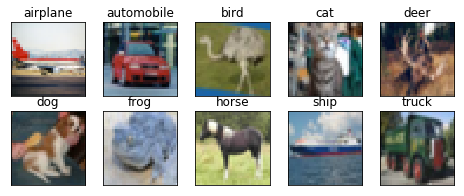

In [3]:
# Here are the classes in the dataset. We'll be using this to
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

num_classes = 10 #number of cifar-10 data set classes

def visualize_classes():
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num,::],(1,2,0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()
    
    
visualize_classes()

## Preprocessing and normalization


A special note in working with data and neural networks is that some preprocessing is involved.

For image processing, the images MUST have the same dimensions and should have near the same pixel density to really make the most out of your predictions. In your own projects, this might mean that you must scale or crop your images beforehand in preprocessing. Luckily for us, the Cifar-10 dataset comes preprocessed.

Image data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. For image inputs we might choose to scale the normalized data in the range [0,1] or [0, 255]. 

Pixel values are in the range of 0 to 255 for each of the red, green and blue channels. (If you're in web or mobile, and you've done your colors with RGB, this is where the values come from)

Since we know the range of the input values due to them following the range of RBG values, we can easily normalize our pixel data to a range 0 to 1 by dividing each value by the maximum observation which is 255 (the end of the RBG color spectrum).

The data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

As of now, each image has been converted into a 3x3 maxtrix representation of each of the color values of the RBG spectrum that are represented, let's have a look at the first picture in numerical format to check!

In [5]:
x_train[0]

array([[[ 0.23137255,  0.16862746,  0.19607843, ...,  0.61960787,
          0.59607846,  0.58039218],
        [ 0.0627451 ,  0.        ,  0.07058824, ...,  0.48235294,
          0.46666667,  0.47843137],
        [ 0.09803922,  0.0627451 ,  0.19215687, ...,  0.4627451 ,
          0.47058824,  0.42745098],
        ..., 
        [ 0.81568629,  0.78823531,  0.7764706 , ...,  0.627451  ,
          0.21960784,  0.20784314],
        [ 0.70588237,  0.67843139,  0.72941178, ...,  0.72156864,
          0.38039216,  0.32549021],
        [ 0.69411767,  0.65882355,  0.7019608 , ...,  0.84705883,
          0.59215689,  0.48235294]],

       [[ 0.24313726,  0.18039216,  0.1882353 , ...,  0.51764709,
          0.49019608,  0.48627451],
        [ 0.07843138,  0.        ,  0.03137255, ...,  0.34509805,
          0.32549021,  0.34117648],
        [ 0.09411765,  0.02745098,  0.10588235, ...,  0.32941177,
          0.32941177,  0.28627452],
        ..., 
        [ 0.66666669,  0.60000002,  0.63137257, ...,

## Encoding our output labels

The output variables are one-hot encoded as a vector of integers from 0 to 1 for each class. This transforms the output into into a binary matrix in order to best model the classification problem of sorting images into 10 "buckets".  We know there are 10 classes for this problem, so we can expect the binary matrix to have a width of 10.

In [6]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Part 2
# Convolutional Layers and Setting up your neural network for image recognition


### Biological mimicry in image recogniton

You may ask yourself, what's the big deal about using a convolutional neural networks for image recognition? Well that comes down to how it mimics pattern recognition in the visual cortex! The visual cortex is a part of your brain that is the powerhouse of sight, vision, and object recognition. Many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field.
The receptive fields of different neurons may overlap, and together they tile the entire visual field. Some  of those neurons only fire on images of vertical lines, while others only fire to lines with different orientations (two neurons may have the same receptive field but fire on different line orientations and directions). Some neurons have larger receptive fields, and they fire on more complex patterns that are combinations of the patterns the lower levels have detected.

Below is a visual example of what this looks like.


![alt text](./visual_cortex_example.png)


The most important building block of a CNN is the convolutional layer:neurons in the first convolutional layer are not connected to every single pixel in the input image , but only to pixels in their receptive fields. In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on low-level features in the first hidden layer, then assemble them into higher-level features in the next hidden layer, and so on. This structure is very common in real-world images, and is one of the reasons why convolutional neural networks work so well for image recognition.

This is the same system that allows us recognize patterns, and what is an image other than patterns that converge to make a consolidated image that your brain recognize as an item? :D

Let's put this idea into action!

## Part 3: Building a Keras Sequential model


Were going to be be building a sequential model classify our images and the architecture is as follows:


1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
2. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
3. Max Pool layer with size 2×2
4. Dropout set to 25%
5. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
6. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
7. Max Pool layer with size 2×2
8. Dropout set to 25%
9. Flatten layer
10. Fully connected layer with 512 units and a rectifier activation function
11. Dropout set to 50%
12. Fully connected output layer with 10 units and a softmax activation function


This is alot to take in if you arent familiar with the structure of CNN's so lets walk through the parts one by one!

####  The Convoluvtional layer
A convolution layer tries to extract higher-level features by replacing data for each (one) pixel with a value computed from the pixels covered by the filter centered on that pixel(all the pixels in that region). In the gif below (cred: Fletcher Bach), the filter used is a 3x3 matrix that counts all of the occurences of 1 (representing that a color is present) in the binary matrix and maps them onto a smaller feature space for the next layer.

![alt text](./cnn-fletcher-bach.gif)

The function that keras uses for this is Conv2D and it has the following parameters:

    - The first argument is the number of filters, in this case 32. Filters are like feature detectors and can represent the number of features (like edges, lines, object parts etc...) that the network can potentially learn. Also note that each filter generates a feature map. Feature maps allow you to learn the explanatory factors within the image so the more of them present, the more the network learns.
    
    - The next tuple sets the kernel_size which represents the filter we discussed earlier, which we've defined as a 3x3 matrix. Of note in this tutorial is that we did not set the strides. This is how many spaces that the kernel slides for each of its movements, this is shown by how the filter slides in the gif above.
    
    - The input shape denotes the shape that the input that we'll be passing into the network. The 3 represents the RBG color arrays that we previously split each image into. The 32's that you see are a representation of the size of the images, which coincidentally are 32 by 32. Since all of the photos have been normalized at this point this should not be an issue in processing, but it is something that you should be aware of in your own implementations
    
    
Please note that for brevity, we have chosen not to define all of the potential arguments availible, for reference Please refer to the documentation

####  The Activation function

Your activation functions are at the core of what makes your neurons work and under what threshold they will fire. You'll cover more of this in later lessons, but just know that the activation functions are customizable to your CNN stack and experiementing with diffrent functions such as "tahn" and "sigmoid" will yeild diffrent results depending on your data and model

For reference the 'ReLu' activation function's threshold. It can be visualized as the following:

![alt text](./relu.jpeg)

#### The MaxPooling layer

This is all about the convolved feature vs pooled feature, what does this mean? Lets take a look at a visual example:

![alt text](./maxpooling1.png)

It means replacing the highest value in an output matrix with the local maximum value of that array. The above graphic (as well as our uses a 2x2 max pooling. This takes the maximum of the matrix and condenses it in the next layer to a smaller feature space thats represented by that local maximum  Note: it is non overlapping thus reducing the resolution, and therefore the amount of processing on the next layer is reduced. This assists in optimization,and you can read more about it here:


#### The Dropout Layer

Dropout is a technique where randomly selected neurons are ignored duringmodel training. They are “dropped-out” or removed at random. This means that their contribution to the activation of downstream neurons is removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.The purpose of this to prevent "over-fitting”. A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data. Basically, it keeps the network from raw memorizing the training data and keeps it actually learning.

Here is a representation of how dropout works vs a fully connected layer

![alt text](./dropout.png)

#### The Flatten and Dense layers

The last stage of a convolutional neural network (CNN) is a classifier. It is called a dense layer, which is just an  neural network classifier and is fully connected.

Becuase an neural network classifier needs individual features, just like any other classifier. This means it needs a feature vector.

Therefore, you need to convert the output of the convolutional part of the CNN into a 1D feature vector, to be used by theneural network part of it. This operation is called flattening. It gets the output of the convolutional layers, flattens all its structure to create a single long feature vector to be used by the dense layer for the final classification.

This is then fed to the actual classifier which is referred as softmax.

#### Softmax

Softmax classifiers give you probabilities for each class label based on what the network has learned, the function itself takes an N-dimensional array ( in this case since its flattened, it will be a 1D array)
Sofmax is ultimately what gives you access to how sure the network is a certain image (in this case) belongs to a certain category.

With all of these in mind lets look at a wide overview of the entire network:


![alt text](./typical_cnn.webp)



With this in mind, lets implement this!

### Part 4 Keras CNN implementation

In [7]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

#### Compiling, running and analyzing our models

The internal parameters of a model play a very important role in efficiently and effectively training a model and produce accurate results. This is why we use various Optimization strategies and algorithms to update and calculate appropriate and optimum values of such model’s parameters which influence our model’s learning process and the output of a model.

Compiling the model takes three parameters: optimizer, loss and metrics.

We do this by using the built in:

```python
model.compile()
```

Let's break this down into its components before we compile it!

**Optimization algorithms**
This helps us to minimize our model's error based off things like Stochastic Gradient Descent(what we will be using today), or the Adam optimizer. This tutorial won't cover all of it's parameters, but this will be covered in your course in depth. Of note is the **learning rate** which controls how quickly your model forgets old information as new information is fed into it. A slow learning rate measn that your midel will train slower but will be less prone to outliers and smaller changes in the data. a larger learning rate will respond wuickly to new changes but will be affected greatly by this new data. Chose your learning rate based on what your model needs to accomplish.


**Loss**
A loss function is simple: it’s a method of evaluating how well your CNN models your data. If your predictions are extremely off, your loss function will output a higher number. If they’re pretty good, it will output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.

**Metrics**
The metrics will output exactly what it says, the metrics for this model that you want to be mesaured, have a look at the documentation



Running summary will give you a summary of your model in it's current form.


Let's look at this!

In [8]:
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
__________

### Part 4 training and validating your model

We're now at the point in which we can now "fit" our model to our data. This step will tell us how well the model weve created will generalize and is one of the final steps before we train and test our model! This gives us access to insights for tweaking our model for better performance.

The parameters are as follows: 
**Epoch** is one forward pass and one backward pass of all the training examples


**Batch_size**
The algorithm will now take the first 100 samples (from 1st to 100th) from the training data and trains the network. Next it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated through all samples of the network. A problem usually happens with the last set of samples. In our example we've used 50000 which is divisible by 100 without remainder. 


Advantages of using a batch size < number of all samples:

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

Lets execute this below and get our scores by using the model.validate()

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Based on the random seed that we set earlier, you hsould be getting accuracys around 90% or so with this model! 

Lets go on to making some predictions!


#### Part 5 Making Predictions

Now that we've consturucted and trained a model, thats gotten solid training It's time for us to test it on some real world data! I've found 5 random images from the internet based on the categories and were going to go through the process on converting these and making predictions with out model using:

```python
model.predict_class()
```

Just like earlier, we f